# 📓 Úloha 1: Programová implementace SIR modelu

Tento notebook implementuje a simuluje šíření infekce pomocí SIR modelu.

Model rozděluje populaci na tři skupiny:
- **S (Susceptible)** – počet jedinců náchylných k infekci
- **I (Infected)** – počet nakažených jedinců
- **R (Recovered)** – počet uzdravených/imunních jedinců

Parametry modelu:
- **β (beta)** – míra přenosu infekce (pravděpodobnost přenosu na kontakt).
- **γ (gamma)** – míra uzdravení (část nakažených, kteří se za jednotku času uzdraví).

Cílem je zjistit:
- Kdy dojde k vrcholu epidemie,
- Jak dlouho epidemie potrvá,
- Kolik jedinců se nakonec nakazí a kolik zůstane zdravých.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Function, Eq, Derivative
from sympy.abc import t
from IPython.display import display

In [6]:
S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)
beta, gamma, N = symbols('beta gamma N', positive=True)

sir_equations = [
    Eq(Derivative(S, t), -beta * S * I / N),
    Eq(Derivative(I, t), beta * S * I / N - gamma * I),
    Eq(Derivative(R, t), gamma * I)
]

for eq in sir_equations:
    display(eq)

Eq(Derivative(S(t), t), -beta*I(t)*S(t)/N)

Eq(Derivative(I(t), t), -gamma*I(t) + beta*I(t)*S(t)/N)

Eq(Derivative(R(t), t), gamma*I(t))

In [7]:
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [8]:
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0

diseases = {
    'Spavá nemoc (Tse-Tse)': 1.5,
    'Chřipka': 1.3,
    'COVID-19': 2.5,
    'Spalničky': 15,
    'Malárie': 3.5
}

gamma = 1/14
t = np.linspace(0, 160, 160)

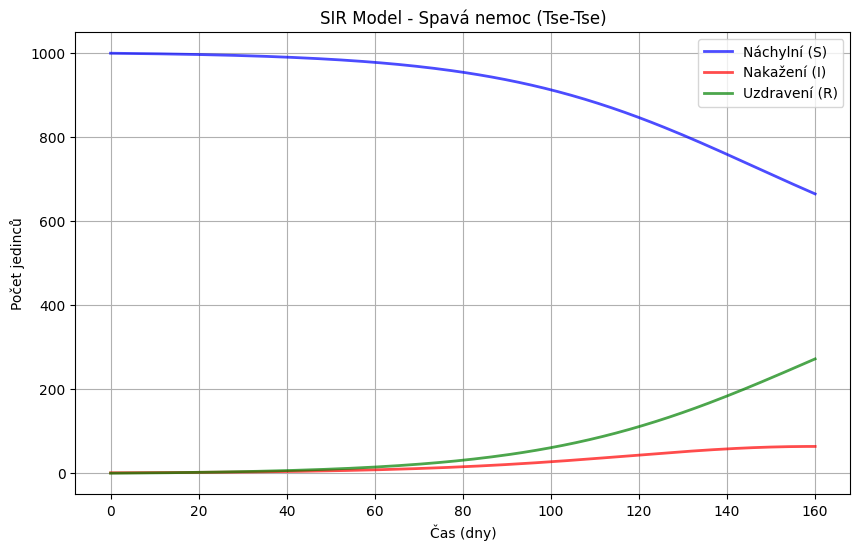


Výsledky pro Spavá nemoc (Tse-Tse):
- Vrchol epidemie nastává přibližně 159.0 dní od začátku.
- Epidemie trvá přibližně 160.0 dní.
- Celkem onemocní 271 osob.
- Zdravých zůstane 664 osob.



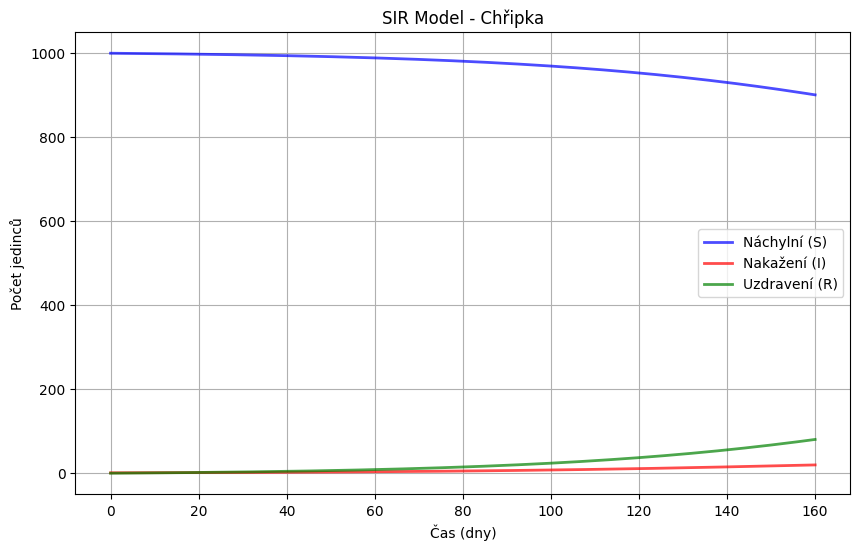


Výsledky pro Chřipka:
- Vrchol epidemie nastává přibližně 160.0 dní od začátku.
- Epidemie trvá přibližně 160.0 dní.
- Celkem onemocní 80 osob.
- Zdravých zůstane 899 osob.



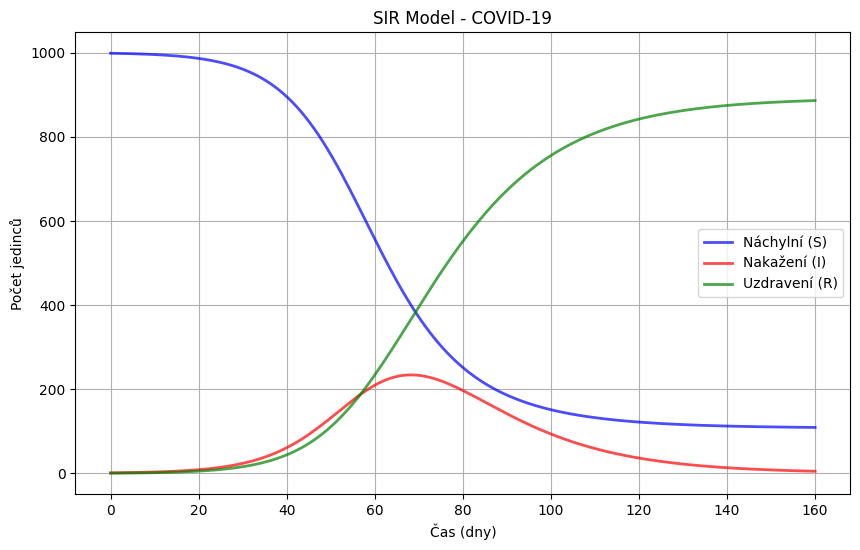


Výsledky pro COVID-19:
- Vrchol epidemie nastává přibližně 68.4 dní od začátku.
- Epidemie trvá přibližně 160.0 dní.
- Celkem onemocní 886 osob.
- Zdravých zůstane 108 osob.



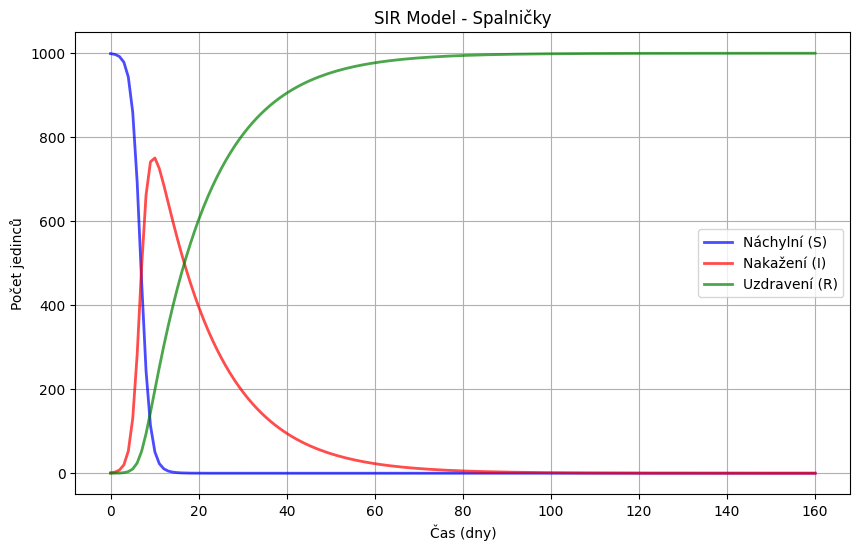


Výsledky pro Spalničky:
- Vrchol epidemie nastává přibližně 10.1 dní od začátku.
- Epidemie trvá přibližně 104.7 dní.
- Celkem onemocní 999 osob.
- Zdravých zůstane 0 osob.



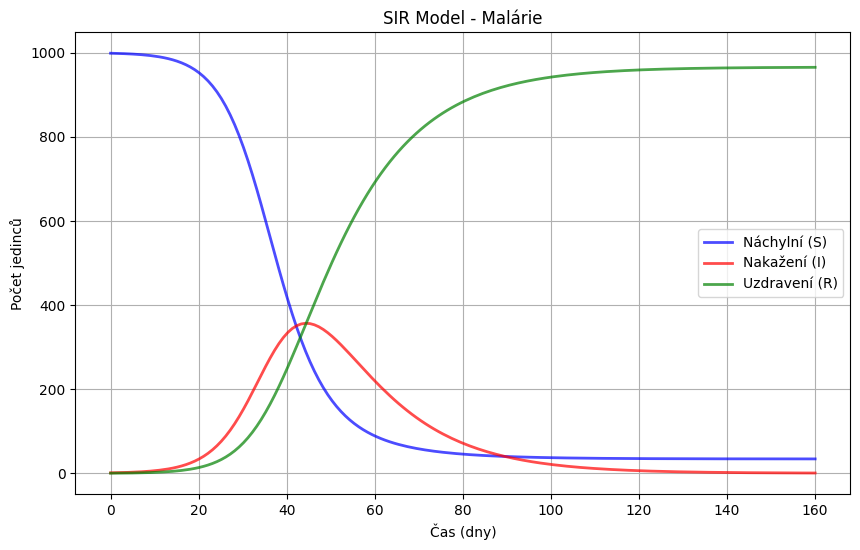


Výsledky pro Malárie:
- Vrchol epidemie nastává přibližně 44.3 dní od začátku.
- Epidemie trvá přibližně 148.9 dní.
- Celkem onemocní 965 osob.
- Zdravých zůstane 34 osob.



In [9]:
for disease, R0_value in diseases.items():
    beta = R0_value * gamma
    y0 = S0, I0, R0

    ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    plt.figure(figsize=(10,6))
    plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Náchylní (S)')
    plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Nakažení (I)')
    plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Uzdravení (R)')
    plt.title(f'SIR Model - {disease}')
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet jedinců')
    plt.legend()
    plt.grid(True)
    plt.show()

    peak_day = t[np.argmax(I)]
    duration = t[np.where(I < 1)[0][0]] if any(I < 1) else t[-1]
    total_infected = int(R[-1])
    never_infected = int(S[-1])

    print(f"\n\033[1mVýsledky pro {disease}:\033[0m")
    print(f"- Vrchol epidemie nastává přibližně {peak_day:.1f} dní od začátku.")
    print(f"- Epidemie trvá přibližně {duration:.1f} dní.")
    print(f"- Celkem onemocní {total_infected} osob.")
    print(f"- Zdravých zůstane {never_infected} osob.\n")

# Závěr

Model ukazuje, že nemoci s vyšším reprodukčním číslem (např. spalničky) vedou k rychlejšímu a intenzivnějšímu šíření, zatímco nemoci s nižším R0 (např. chřipka, spavá nemoc) se šíří pomaleji a zasáhnou menší část populace.

Simulace zároveň demonstruje důležitost reprodukčního čísla při predikci dynamiky epidemie.